<a href="https://colab.research.google.com/github/samuel0325/beBaillionaire/blob/master/KCC_2020_Tutorial_on_Human_Activity_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **KCC 2020 Tutorial: Human Activity Recognition**
*This material is prepared by Kim Auk (kimauk@kaist.ac.kr)*

# What is a Feature?
* *Feature* in machine learning is defined as *an individual measuarable property or characteristic of a phenomenon being observed*. 
* The purpose of feature engineering or feature extraction is to choose informative and discriminating features to well describe different data set, patterns, or classes.
* Features can be numeric, strings, or categorical values.
* Raw data can be directly used as features; however, such features are very vulnerable to noises, outliers, or something else. 
* Typically, features are extracted from several *subsets of entire data*, where each subset corresponds to the point that we are interested in (e.g., the point having *class label* in classification).



## Feature Extraction on Sensory Data
* Typically, IMU sensors (e.g., an accelerometer, a gyroscope, and a magnetometer) or bio-physiological sensors (e.g., a heart rate tracker, an electrocadiogram) provide their readings as *numerical values* on the *time domain*.
* In other words, this datum is formed as its value and collection time: $\mathbf{X} = x_t$
* In addition, the point we are interested in is also formed as its value (e.g., *class labels* in classification, *continous values* in regression) and the time: $\mathbf{Y}=y_t$
* For a given $y_t$, feature extraction is conducted on a subset of data collected during a certain amount of time (i.e., time window), $\lambda$, before $t$: $$X_t = \{x_t|t\in[t-\lambda, t)\}$$



## Distinct vs. Overlapped Time Window
* To separate entire data into windows, we can consider that each window does not overlap other window: *distinct window*. It is simple, but it loses information at the boundaries.

![대체 텍스트](http://drive.google.com/uc?export=view&id=1BDE_8CbVTYsqX-9MoUf6dfqV2qIQYGdb)

* Another alternative is to allow a time window to be overlapped with its consecutive window, *sliding or overlapped window*.
  * An example below is the overlap of 50% of a window size on consecutive windows.

![대체 텍스트](http://drive.google.com/uc?export=view&id=1r93X2gPdj0kC-L9RMCietzDsbA54uBax)

#  Preliminary Setting

## Install Dependencies

* In this tutorial, we will use **UCI's HAPT (Human Activities and Postural Transitions) dataset**.

* For details of HAPT dataset, please see [HAPT dataset website](http://archive.ics.uci.edu/ml/datasets/Smartphone-Based+Recognition+of+Human+Activities+and+Postural+Transitions).

* For easiness of importing datasets, we need to install a dataset module including UCI's HAPT dataset.

In [1]:
%pip install kcc2020-tutorial-HAR-dataset

     |████████████████████████████████| 18.8MB 1.4MB/s 
  Created wheel for kcc2020-tutorial-HAR-dataset: filename=kcc2020_tutorial_HAR_dataset-0.1.4-cp36-none-any.whl size=18821649 sha256=62255164da2c35f04691346a18c9c6545b2fdd0c6844fcdc803a9c9b45d8ead6
  Stored in directory: /root/.cache/pip/wheels/dc/39/6e/83c9145153facebb99d4ea0837484ca3bd80a552e5981c05b9
Successfully built kcc2020-tutorial-HAR-dataset


## UCI's HAPT Dataset

* Data are separated by participants and each file contains raw triaxial signals (i.e., x, y, z) from the accelerometer or the gyroscope.

* There are two data (e.g., experiment #1 ~ experiment #3) for each partcipant.

* Sampling frequency of the accelerometer and the gyroscope is 50 Hz. In other words, they are collected in every 20 milliseconds (1/50sec = 1000/50ms).

* This dataset was collected from a smartphone on the waist while participants were performing 6 differenent activities. 

* The activities and the corresponding label number are as follows:
      1 : WALKING           
      2 : WALKING_UPSTAIRS  
      3 : WALKING_DOWNSTAIRS
      4 : SITTING           
      5 : STANDING          
      6 : LAYING 

* The following video shows the data-collection experiments including an example of the 6 recorded activities with one of the participants.
       


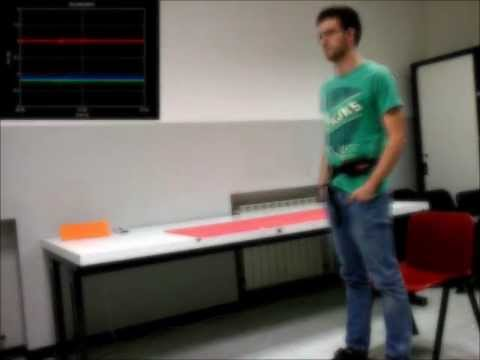

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('XOEN9W05_4A', width=600, height=400)

## Importing HAPT dataset
* The method 'load_all()' returns a dictionary contraining a set of list of each user's data (two pandas' DataFrame).
* You can access each list by referring to user ID (1~30).

In [5]:
from KCC2020_HAR_dataset import load_all

entire_dataset = load_all()

print('user IDs:\n{}'.format(entire_dataset.keys()))

user IDs:
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])


The method 'load_by_user(uid)' returns a list of each user's data (two pandas' DataFrame) with given uid.

In [7]:
from KCC2020_HAR_dataset import load_by_user
import numpy as np

data = load_by_user(1)

print('Activity recognition dataset: Participant No: #1\n')
for index in np.arange(0, len(data)):
  print('- Experiment No: #{}\n- Head: \n{}\n'.format(index, data[index].head()))

Activity recognition dataset: Participant No: #1

- Experiment No: #0
- Head: 
        acc-x     acc-y     acc-z  label
250  1.020833 -0.125000  0.105556      5
251  1.025000 -0.125000  0.101389      5
252  1.020833 -0.125000  0.104167      5
253  1.016667 -0.125000  0.108333      5
254  1.018056 -0.127778  0.108333      5

- Experiment No: #1
- Head: 
        acc-x     acc-y     acc-z  label
251  0.990278 -0.337500  0.022222      5
252  0.986111 -0.340278  0.012500      5
253  0.987500 -0.333333  0.011111      5
254  0.988889 -0.327778  0.012500      5
255  0.986111 -0.333333  0.009722      5



## Preparation

 



* We are going to use User #1's first data to show an example of feature generation process.
* The 'index' column, which is the first column, shows the row index.

* For the current data, the row index starts from 250 because any rows with empty label have been removed in advanced.

In [8]:
data = load_by_user(1)[0]
data.head()

acc-x     acc-y     acc-z  label
250  1.020833 -0.125000  0.105556      5
251  1.025000 -0.125000  0.101389      5
252  1.020833 -0.125000  0.104167      5
253  1.016667 -0.125000  0.108333      5
254  1.018056 -0.127778  0.108333      5

### Calculate magnitude
* Each dimension only represents its own direction. In order to understand characteristics regardless of directions, we add a *magnitude* of those readings: $$Mag = \sqrt{(x^2 + y^2 + z^2)}$$
 

In [9]:
import numpy as np

# Create a new column (i.e., mag) and assign magnitude values to the column
def calculateMagnitudeValues(data):
  df = data.copy()
  df['acc-mag'] = np.sqrt(df['acc-x'] ** 2 + df['acc-y'] ** 2 + df['acc-z'] ** 2)
  return df

data = calculateMagnitudeValues(data)
data.head()

acc-x     acc-y     acc-z  label   acc-mag
250  1.020833 -0.125000  0.105556      5  1.033861
251  1.025000 -0.125000  0.101389      5  1.037560
252  1.020833 -0.125000  0.104167      5  1.033720
253  1.016667 -0.125000  0.108333      5  1.030035
254  1.018056 -0.127778  0.108333      5  1.031746

### Create 'timestamp' column 

* We  create a 'timestamp' column using 'index' column. 

* The sampling rate is 50 Hz (i.e., collected every 20 ms). We assign the result values of multiplying the index column with 20, to 
 'timestamp' column. 

In [10]:
def createTimestamp(df):
  data = df.copy()  
  data['timestamp'] = data.index*20
  return data

data = createTimestamp(data)
data.head()

acc-x     acc-y     acc-z  label   acc-mag  timestamp
250  1.020833 -0.125000  0.105556      5  1.033861       5000
251  1.025000 -0.125000  0.101389      5  1.037560       5020
252  1.020833 -0.125000  0.104167      5  1.033720       5040
253  1.016667 -0.125000  0.108333      5  1.030035       5060
254  1.018056 -0.127778  0.108333      5  1.031746       5080

### Create 'str_label' column
* For easiness of analysis, we add string labels to each sample of accelerometer data based on our label data.

In [11]:
labelMap = {
  1 : 'WALKING',           
  2 : 'WALKING_UPSTAIRS',
  3 : 'WALKING_DOWNSTAIRS',
  4 : 'SITTING',
  5 : 'STANDING',          
  6 : 'LAYING',
}

for label_in_integer in labelMap: 
  data.loc[data['label'] == label_in_integer, 'str_label'] = labelMap[label_in_integer]

data.head()

acc-x     acc-y     acc-z  label   acc-mag  timestamp str_label
250  1.020833 -0.125000  0.105556      5  1.033861       5000  STANDING
251  1.025000 -0.125000  0.101389      5  1.037560       5020  STANDING
252  1.020833 -0.125000  0.104167      5  1.033720       5040  STANDING
253  1.016667 -0.125000  0.108333      5  1.030035       5060  STANDING
254  1.018056 -0.127778  0.108333      5  1.031746       5080  STANDING

## Visualization
* Visualization help to (1) better understand data, (2) extract insightful information, and (3) examine hypotheses.

* We are going to visualize the data with (1) line graph and (2) heatmap. 

### Line graph

In [12]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

def plotLineGraph(plot_df, title, yaxis_title_text, xAsRowIndex=False):  
  plot_data = plot_df.copy()

  labelMap = {
      1 : 'WALKING',           
      2 : 'WALKING_UPSTAIRS',
      3 : 'WALKING_DOWNSTAIRS',
      4 : 'SITTING',
      5 : 'STANDING',          
      6 : 'LAYING',
    }
  for label_in_integer in labelMap: 
    plot_data.loc[plot_data['label'] == label_in_integer, 'str_label'] = labelMap[label_in_integer]

  if xAsRowIndex:
    plot_data['timestamp'] = [index for index in np.arange(0, len(plot_data))]
  
  label_data = plot_data  

  fig = go.Figure()

  for column in plot_data.columns:
    if 'label' not in column and 'timestamp' not in column:
      fig.add_trace(
        go.Scatter(
          x=plot_data['timestamp'],
          y=plot_data[column],
          name=column
          )
      )

  if label_data is not None:
    act_start = label_data[label_data['label'] != label_data.shift(1)['label']]
    act_end = label_data[label_data['label'] != label_data.shift(-1)['label']]

    fig.update_layout(
      shapes=[
        go.layout.Shape(
          x0=s.timestamp, x1=e.timestamp, y0=0, y1=1, yref='paper', 
          # paper (normalized coordinate) y-reference is assigned to the plot paper [0,1] see more: https://plot.ly/python/shapes/
        ) for s, e in zip(act_start.itertuples(), act_end.itertuples())
      ],
      annotations=[
        go.layout.Annotation( # if you are interested in details, see https://plot.ly/python/text-and-annotations/ 
          text=s.label, x=s.timestamp + (e.timestamp - s.timestamp) / 2, y=1, yref='paper', hovertext = e.str_label
        ) for s, e in zip(act_start.itertuples(), act_end.itertuples())
      ],
      xaxis_title_text= '$Row~index (50 Hz)$',
      yaxis_title_text= yaxis_title_text,
      title= title
    )

  fig.show()

In [13]:
plotLineGraph(data, 'Accelerometer traces', '$Acceleration~(m/s^2)$')

* The line graph look a bit strange; there are several gaps (e.g., a gap between first box and second box) because rows with no labels were removed in advance.

* The below line graph shows without gaps.

In [14]:
plotLineGraph(data, 'Accelerometer traces', '$Acceleration~(m/s^2)$', xAsRowIndex=True)

### Heatmap
* For more intuitive visualization, we can use a heatmap.

In [15]:
import plotly.graph_objs as go

def plotHeatmap(plot_df, title, yaxis_title_text, label_df = None, xAsRowIndex=False):  
  plot_data = plot_df.copy()

  labelMap = {
      1 : 'WALKING',           
      2 : 'WALKING_UPSTAIRS',
      3 : 'WALKING_DOWNSTAIRS',
      4 : 'SITTING',
      5 : 'STANDING',          
      6 : 'LAYING',
    }
  for label_in_integer in labelMap: 
    plot_data.loc[plot_data['label'] == label_in_integer, 'str_label'] = labelMap[label_in_integer]

  if xAsRowIndex:
    plot_data['timestamp'] = [index for index in np.arange(0, len(plot_data))]
  
  label_data = plot_data 
  
  columns_to_be_droped = []
  for column in plot_data.columns:
    if not('x' in column or 'y' in column or 'z' in column or 'mag' in column):
      columns_to_be_droped.append(column)
  
  # Here we use go.Heatmap() instead of go.Scatter() 
  # you need to specify 3-axes for heatmap plotting 

  fig = go.Figure(
      go.Heatmap(
          x=plot_data['timestamp'],
          y=plot_data.drop(columns_to_be_droped, axis=1).columns,
          z=plot_data.drop(columns_to_be_droped, axis=1).to_numpy().transpose()
      )
  )

  if label_data is not None:
    # for annotation 
    act_start = label_data[label_data['label'] != label_data.shift(1)['label']]
    act_end = label_data[label_data['label'] != label_data.shift(-1)['label']]

    fig.update_layout(
      shapes=[
        go.layout.Shape(
          x0=s.timestamp, x1=e.timestamp, y0=0, y1=1, yref='paper'
        ) for s, e in zip(act_start.itertuples(), act_end.itertuples())
      ],
      annotations=[
        go.layout.Annotation(
          text=s.label, x=s.timestamp + (e.timestamp - s.timestamp) / 2, y=1, yref='paper', hovertext = e.str_label
        ) for s, e in zip(act_start.itertuples(), act_end.itertuples())
      ],
      xaxis_title_text='Row index~(50 Hz)',
      yaxis_title_text=yaxis_title_text,
      title=title
    )

  fig.show()

In [16]:
plotHeatmap(data, 'Accelerometer traces', '$Acceleration~(m/s^2)$')

In [17]:
plotHeatmap(data, 'Accelerometer traces', '$Acceleration~(m/s^2)$', xAsRowIndex=True)

# Handling Numerical Data on Time Domain



## Candidate Features
* Simple but widely-used statistics are: ***mean, max, min, and standard deviation***.
  * In addition, we can consider other candidates, including *kurtosis*, *skewneess*, *discrete wavelet transform (DWT)*, *slope*, or etc.
* We extract features by calculating such statistics on each window.
  * Mean: $\mu_t = \frac{1}{\lambda} \sum_{k=t-\lambda}^{t-1}x_t$
  * Max: $M_t = \max_{t \in [t-\lambda, t)} x_t$
  * Max: $m_t = \min_{t \in [t-\lambda, t)} x_t$
  * Std. Dev: $\sigma = \sqrt{\bigg[ \sum_{k=t-\lambda}^{t-1} (x_t - \mu_t)^2 \bigg] / \lambda} $

* (Optional) After extracting features, we need to transform each feature into same scales, because some machine learning models (e.g., SVM, linear regression) are very vulnerable to different scales.
  * *scikit-learn.preprocess* provides several scaling functions (e.g., StandardScaler, MinMaxScaler, RobustScaler, etc.)
  * [https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing](https://https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing)

## Practice on UCI's HAPT dataset

### Calculate Features
* For feture extraction, we consider an overlapped window; see an example below with the overlap of 50% of a window size on consecutive windows.

![대체 텍스트](http://drive.google.com/uc?export=view&id=1r93X2gPdj0kC-L9RMCietzDsbA54uBax)

* Non-overlapped windows are commonly considered less accurate compared to overlapped windows because:
        (1) overlapped windows result in more data points, which usually increases the performance of classifiers
        (2) non-overlapped windows may miss important events in the dataset. 

* A more formal discussion of the superiority of overlapped windows over non-overlapped ones can be found in [\[Banos et al., 2014\]](https://www.mdpi.com/1424-8220/14/4/6474).


In [18]:
import numpy as np
import pandas as pd

def getTimeDomainFeatures(df, window_size_in_ms = 3000, overlap_ratio = 0.5):
  data = df.copy()
  
  sensor_columns = []
  for column in data.columns:
    if 'x' in column or 'y' in column or 'z' in column or 'mag' in column:
      sensor_columns.append(column)

  START_TIME, END_TIME = data['timestamp'].min(), data['timestamp'].max()
  # (0.0, 2608000.0)
  # arange([start, ]stop, [step, ]dtype=None)
  # find the end time of each window by considering the overlapping ratio 
  FEATURES_TIME = []
  WINDOWS = np.arange(START_TIME + window_size_in_ms, END_TIME, window_size_in_ms * (1 - overlap_ratio))

  for w in WINDOWS:
    win_start, win_end = w - window_size_in_ms, w
    labels = data[(win_start <= data['timestamp']) & (data['timestamp'] < win_end)].label
    labels_max = labels.min()
    if labels_max  != labels.min():
      continue
    FEATURES_TIME.append((w, 'label', labels_max))

    for var in sensor_columns:
      # select the rows that belong to the current window, w
      value = data.loc[(win_start <= data['timestamp']) & (data['timestamp'] < win_end), var].values
      # extract basic features 
      min_v = value.min() # min
      max_v = value.max() # max
      mean_v = value.mean() # mean
      std_v = value.std() # std. dev.
      
      # append each result (w: current window's end-timestamp, extracted feature) as a new row
      FEATURES_TIME.append((w, '{}-{}'.format('Min', var), min_v))
      FEATURES_TIME.append((w, '{}-{}'.format('Max', var), max_v))
      FEATURES_TIME.append((w, '{}-{}'.format('Mean', var), mean_v))
      FEATURES_TIME.append((w, '{}-{}'.format('Std', var), std_v))

  # FEATURES_TIME looks like this <timestamp, feature name, value> 
  # (4000.0, 'Min-x', -1.848), (4000.0, 'Max-x', -1.659), (4000.0, 'Mean-x', -1.7706786155747838), (4000.0, 'Std-x', 0.023614236975760955)
            
  # Create a dataframe w/ column names: timestamps, feature, value  
  FEATURES_TIME = pd.DataFrame(FEATURES_TIME, columns=['timestamp', 'feature', 'value'])

  # Reshape data to produce a pivot table based on column values
  FEATURES_TIME = FEATURES_TIME.pivot(index='timestamp', columns='feature', values='value').reset_index()
  return FEATURES_TIME

In [20]:
import numpy as np
import pandas as pd

#@title Setting
WIN_SIZE_IN_MS = 2000 #@param {type:"slider", min:1000, max:5000, step:1000}
OVERLAP_RATIO = 0.5 #@param {type:"slider", min:0.2, max:0.8, step:0.1}

FEATURES_TIME = getTimeDomainFeatures(data, WIN_SIZE_IN_MS, OVERLAP_RATIO)
FEATURES_TIME.head()

feature  timestamp  Max-acc-mag  Max-acc-x  ...  Std-acc-y  Std-acc-z  label
0           7000.0     1.041171   1.027778  ...   0.003756   0.004855    5.0
1           8000.0     1.041171   1.027778  ...   0.004353   0.006026    5.0
2           9000.0     1.037763   1.025000  ...   0.006213   0.006674    5.0
3          10000.0     1.041220   1.029167  ...   0.007124   0.007169    5.0
4          11000.0     1.041220   1.029167  ...   0.004570   0.006445    5.0

[5 rows x 18 columns]

In [21]:
plotLineGraph(FEATURES_TIME, 'Feature value traces', '$Feature value$')

### Scaling 
* In this example, we scale each feature using *MinMaxScaler*, where values are bounded to a range from 0 to 1; for a given input X, minmax = X-x_min / x_max - x_min. For details about scaling, please read [this blog article](https://sebastianraschka.com/Articles/2014_about_feature_scaling.html).    


In [22]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

def getScaledFeatures(df):
  scaled = MinMaxScaler().fit_transform(df.drop(columns=['timestamp','label']).to_numpy())
  # fit: Compute the minimum and maximum to be used for later scaling.
  # transform: Scaling features of X according to feature_range.
  # fit_transform: fit & transform at the same time 
  # both input/output are numpy arrays, and thus, DataFrame needs to be converted to a NumPy array (by callig to_numpy()) 

  # DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)[source] 
  result = pd.DataFrame(
    np.column_stack([df['timestamp'], scaled, df['label']]),
    columns=df.columns
  )
  return result


FEATURES_TIME_SCALED = getScaledFeatures(FEATURES_TIME)
FEATURES_TIME_SCALED.head()

feature  timestamp  Max-acc-mag  Max-acc-x  ...  Std-acc-y  Std-acc-z  label
0           7000.0     0.162572   0.569669  ...   0.012671   0.021467    5.0
1           8000.0     0.162572   0.569669  ...   0.014683   0.026645    5.0
2           9000.0     0.159764   0.568373  ...   0.020958   0.029509    5.0
3          10000.0     0.162613   0.570318  ...   0.024032   0.031699    5.0
4          11000.0     0.162613   0.570318  ...   0.015416   0.028497    5.0

[5 rows x 18 columns]

### Visualize Features on Time Domain

In [23]:
plotLineGraph(FEATURES_TIME_SCALED, 'Feature value traces', '$Feature value$')

### Evalution method

* We can consider three evaluation methods: (1) holdout method, (2) k-fold cross-validation, (3) leave-one-subject out cross-validation.

* In general, when dealing with time-serial data, leave-one-subject-out cross-validation or hold-out method is widely used due to the *neighborhood bias* [\[Hammerla 2015\]](https://dl.acm.org/doi/10.1145/2750858.2807551), which will be discussed in detail later.


#### Holdout method

* For holdout method, dataset is separated into two sets, called the training set and the testing set.

* In general, 80% of dataset is used as the training set.

* The below shows the illustration of holdout method when n = 12 observation (80% - 10 as training set)

![대체 텍스트](http://drive.google.com/uc?export=view&id=1GWR_-kYa6GAxn-Gcdr_lat6iW2GC33-z)


#### K-fold cross-validation
* In k-fold cross-validation, dataset is **randomly divided** into k subsets, and the holdout method is repeated k times. 

* In general, 10 fold is used. Note that the below illustration shows *6*-fold cross-validation.

![대체 텍스트](http://drive.google.com/uc?export=view&id=1pZY-hnTdjb8afbFbPvqVce67MxCp48js)

* In time-serial data, samples that were placed neary by each other tend to be exactly or nearly identical.

* The randomly shuffle unintentionally leads some exactly or nearly identical samples to be present in both training set and test set.

* Due to this issue, leave-one-subject-out cross-validation is widely used in the field of human activity recognition [\[Hammerla 2015\]](https://dl.acm.org/doi/10.1145/2750858.2807551).


In [24]:
from sklearn.model_selection import cross_val_predict
from sklearn.base import clone

def kFoldCrossValidation(x, y, classifier, k = 10):
  _classifier = clone(classifier)
  y_pred = cross_val_predict(_classifier, x, y, cv=k)
  return y, y_pred

#### Leave-one-out-subject cross-validation

* In this validation, each subject(or person)'s dataset is repeatedly used as the test set while the rest is used as the training set.

* The below illustration of Leave-one-out-subject cross-validation when there are three subjects.

![대체 텍스트](http://drive.google.com/uc?export=view&id=18YyPUfjjbcQcKmB--n5U_po6LgIJQZ_C)

In [25]:
from sklearn.base import clone
import numpy as np

def leaveOneOutSubjectCrossValidation(x_list, y_list, classifier):
  y = None; y_pred = None
  subject_index_list = np.arange(0, len(x_list))
  for test_index in subject_index_list:
    x_train = None; y_train = None
    for subject_index in subject_index_list:
      if subject_index != test_index:
        x_train = x_list[subject_index] if x_train is None else np.concatenate((x_train, x_list[subject_index]), axis=0)
        y_train = y_list[subject_index] if y_train is None else np.concatenate((y_train, y_list[subject_index]), axis=None)
    _classifier = clone(classifier)
    _classifier = _classifier.fit(x_train, y_train)
    _y_pred = _classifier.predict(x_list[test_index])
    y_pred = _y_pred if y_pred is None else np.concatenate((y_pred, _y_pred), axis=None)
    y = y_list[test_index] if y is None else np.concatenate((y, y_list[test_index]), axis=None)
    return y, y_pred

### Training and testing an ML model

* We are going to build a model that classify 6 activities, using the decision tree algorithm.

* For the evaluation, we will user k-fold cross-validation and leave-one-out-subject cross validation.

#### K-fold cross-validation

* We first prepare a dataset for the traing and testing.
* We are going to use the first data of 15 users because using entire dataset tasks a long waiting time. 

In [26]:
from KCC2020_HAR_dataset import load_by_user
import pandas as pd

dfs = []

for uid in np.arange(1, 16):
  df = load_by_user(uid)[0].copy()
  df = calculateMagnitudeValues(df)
  df = createTimestamp(df)
  df = getTimeDomainFeatures(df)
  df = getScaledFeatures(df)
  dfs.append(df)

data = pd.concat(dfs, ignore_index=True)

columns_to_be_droped = []
for column in data.columns:
  if not('x' in column or 'y' in column or 'z' in column or 'mag' in column):
    columns_to_be_droped.append(column)

x, y = data.drop(columns=columns_to_be_droped).to_numpy(), data['label']

In [27]:
from sklearn import tree

classifier = tree.DecisionTreeClassifier(criterion='entropy') 
y_test, y_pred = kFoldCrossValidation(x, y, classifier, k = 10)

In [28]:
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# let's plot a confusion matrix 
# based on this sample: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py 
def plot_confusion_matrix(y_true, y_pred, normalize=False):
  print({1 : 'WALKING',2 : 'WALKING_UPSTAIRS',3 : 'WALKING_DOWNSTAIRS',4 : 'SITTING',5 : 'STANDING',6 : 'LAYING'})
  print()
  print('Confusion matrix of the classifier')
  cm = confusion_matrix(y_true, y_pred)
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

  fig = plt.figure() 
  ax = fig.add_subplot(111) 
  cax = ax.matshow(cm, cmap=plt.cm.Blues) 

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i in range(cm.shape[0]):
      for j in range(cm.shape[1]):
          ax.text(j, i, format(cm[i, j], fmt),
                  ha="center", va="center",
                  color="white" if cm[i, j] > thresh else "black")  

  #for (i, j), z in np.ndenumerate(cm): 
  #    ax.text(j, i, '{:3d}'.format(z), ha='center', va='center',
  #      bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))
  classes = [1, 2, 3, 4, 5, 6]
  #plt.title('Confusion matrix of the classifier') 
  fig.colorbar(cax)   
  ax.set_xticklabels([''] + classes) 
  ax.set_yticklabels([''] + classes) 
  plt.xlabel('Predicted') 
  plt.ylabel('True') 

  plt.show()

  print(metrics.classification_report(y_true, y_pred, digits=3))

{1: 'WALKING', 2: 'WALKING_UPSTAIRS', 3: 'WALKING_DOWNSTAIRS', 4: 'SITTING', 5: 'STANDING', 6: 'LAYING'}

Confusion matrix of the classifier


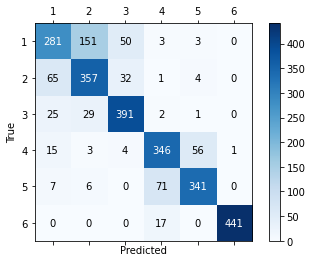

              precision    recall  f1-score   support

         1.0      0.715     0.576     0.638       488
         2.0      0.654     0.778     0.710       459
         3.0      0.820     0.873     0.845       448
         4.0      0.786     0.814     0.800       425
         5.0      0.842     0.802     0.822       425
         6.0      0.998     0.963     0.980       458

    accuracy                          0.798      2703
   macro avg      0.802     0.801     0.799      2703
weighted avg      0.801     0.798     0.797      2703



In [29]:
plot_confusion_matrix(y_test, y_pred)

#### Leave-one-out-subject cross-validation
* Simlar to the k-fold cross-validation, we use the first data of 15 users.

In [30]:
from KCC2020_HAR_dataset import load_by_user
import pandas as pd

columns_to_be_droped = []
for column in data.columns:
  if not('x' in column or 'y' in column or 'z' in column or 'mag' in column):
    columns_to_be_droped.append(column)

x_list = []
y_list = []

for uid in np.arange(1, 16):
  df = load_by_user(uid)[0].copy()
  df = calculateMagnitudeValues(df)
  df = createTimestamp(df)
  df = getTimeDomainFeatures(df,)
  df = getScaledFeatures(df)
  x, y = df.drop(columns=columns_to_be_droped).to_numpy(), df['label']
  x_list.append(x)
  y_list.append(y)

In [31]:
from sklearn import tree

classifier = tree.DecisionTreeClassifier(criterion='entropy') 
y_test, y_pred = leaveOneOutSubjectCrossValidation(x_list, y_list, classifier)

{1: 'WALKING', 2: 'WALKING_UPSTAIRS', 3: 'WALKING_DOWNSTAIRS', 4: 'SITTING', 5: 'STANDING', 6: 'LAYING'}

Confusion matrix of the classifier


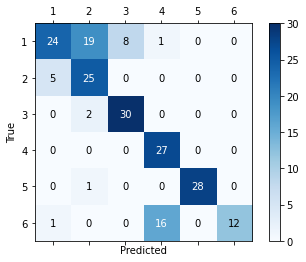

              precision    recall  f1-score   support

         1.0      0.800     0.462     0.585        52
         2.0      0.532     0.833     0.649        30
         3.0      0.789     0.938     0.857        32
         4.0      0.614     1.000     0.761        27
         5.0      1.000     0.966     0.982        29
         6.0      1.000     0.414     0.585        29

    accuracy                          0.734       199
   macro avg      0.789     0.769     0.737       199
weighted avg      0.791     0.734     0.720       199



In [32]:
plot_confusion_matrix(y_test, y_pred)

# Handling Numerical Data on Frequency Domain
* One of important characteristics in our data is the periodicity of sensor readings, especially in walking activities.
* In other words, if we can extract periodical characteristics, it is easy to distinguish activities.
* To this end, we can utilize features on the *frequency domain*.

## Feature Extraction on Frequency Domain
* Features on the frequency domain is basically based on *Fast Fourier transform*.
* After conducting FFT, we can get frequency elements on $k$-th frequency bins, as follows:
$$X_k = \sum_{n=0}^{N-1} x_n \cdot e^{-\mathbf{i}\frac{2\pi}{N} kn} = \sum_{k=0}^{N-1} x_n \cdot \bigg[ \cos \big(\frac{2\pi}{N}kn \big) - \mathbf{i} \cdot \sin \big(\frac{2\pi}{N}kn\big) \bigg] = \mathbf{Re}(X_k) + \mathbf{Im}(X_k)$$
* From this, we can calculate a normalized amplitude:
$$ A_k = \frac{1}{N}\sqrt{\mathbf{Re}(X_k)^2 + \mathbf{Im}(X_k)^2}$$
* Or, a power spectrum:
$$ P_k = \frac{1}{N}\bigg(\mathbf{Re}(X_k)^2 + \mathbf{Im}(X_k)^2\bigg)$$
* Typically, feature extraction on the frequency domain is conducted on $A_k$.

## Candidate Features
* Frequency of the maximum amplitude:
$$\mathrm{argmax}_{k \in [0, N)} A_k$$
* Frequency-weighted average of amplitudes (or power):
$$\frac{\sum_{k=0}^{N-1} A_k \cdot f_k}{\sum_{k=0}^{N-1} A_k} ~\mathrm{or}~ \frac{\sum_{k=0}^{N-1} A_k^2 \cdot f_k}{\sum_{k=0}^{N-1} A_k^2}$$
* Power spectral entropy:
$$- \sum_{k=0}^{N-1} p_k \ln p_k~\text{where}~p_k = \frac{A_k^2}{\sum_{k=0}^{N-1} A_k^2} $$

* Note that the 0-th frequency component (i.e., DC component) is excluded when calculating those features.

## Toy Practice
* Before applying to UCI's **Activity Recognition dataset**, we practice feature extraction on a toy example.
* In this example, we assume that:
  * Entire collection time is $10.0s$.
  * Sampling frequency, $f_s = 100 \mathrm{Hz}$
  * Sample signal: sinusoidal waves at $5, 10, 20 \mathrm{Hz}$.
  * Window size in time: $2.56s$ (meaning $256$ samples)
  * Window overlap-ratio: $50\%$
  * Bin size of FFT: $256$


### FFT Analysis

In [33]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

F_s = 100.0
N = 256
WIN_SIZE = 2
P = 1.0 / F_s
T = np.arange(0, 10, P)
S = np.sin(2 * np.pi * 5.0 * T) + np.sin(2 * np.pi * 10.0 * T) + np.sin(2 * np.pi * 20.0 * T)
DF = pd.DataFrame(np.column_stack([T, S]), columns=['timestamp', 'value'])

W = np.arange(WIN_SIZE, 10.0, WIN_SIZE * 0.5)
PLOTS = []

for w in W:
  sub = DF.loc[(DF['timestamp'] >= w - WIN_SIZE) & (DF['timestamp'] < w), 'value']
  fft = np.fft.fft(sub.to_numpy() * np.hamming(len(sub.index)), n=N)[:N//2]
  freq = np.fft.fftfreq(N, P)[0:N//2] 
  
  bar = go.Bar(x=freq, y=np.abs(fft), name='Frequency domain at time {}'.format(w))
  PLOTS.append(bar)

fig = make_subplots(rows=len(PLOTS) + 1, cols=1)
fig.add_trace(
  go.Scatter(x=DF['timestamp'], y=DF['value'], name='Time domain'), row=1, col=1
)
for idx, plot in enumerate(PLOTS):
  fig.add_trace(plot, row=idx+2, col=1)

fig.update_layout(height=800)

fig.show()

* Our results show that frequency at 5Hz, 10Hz, and 20Hz have higher amplitude, as our setting is.
* In addition, different start points of windows show same frequency results.

### Feature Extraction
* Now, we extract features as stated above and visualize how informative such features are.

In [34]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go

FEATURES_FREQ_TOY = []
for w in W:
  sub = DF.loc[(w - WIN_SIZE <= DF['timestamp']) & (DF['timestamp'] < w), 'value']
  # Important: Excluding the 0-th frequency components
  fft = np.fft.fft(sub.to_numpy() * np.hamming(len(sub.index)), n=N)[1:N//2]
  freq = np.fft.fftfreq(N, P)[1:N//2]

  amp = np.abs(fft)
  energy = amp ** 2
  amp_norm = amp / N
  energy_norm = energy / N
  
  freq_max_amp = freq[np.argmax(amp_norm)]
  weight_amp_avg = np.sum(amp * freq) / np.sum(amp)
  weight_energy_avg = np.sum(energy * freq) / np.sum(energy)
  power_entropy = - np.sum((energy / np.sum(energy)) * np.log(energy / np.sum(energy)))

  FEATURES_FREQ_TOY.append((w, 'Freq. Max. Amp', freq_max_amp))
  FEATURES_FREQ_TOY.append((w, 'Weighted Avg. Amp', weight_amp_avg))
  FEATURES_FREQ_TOY.append((w, 'Weighted Avg. Energy', weight_energy_avg))
  FEATURES_FREQ_TOY.append((w, 'Power Spec. Entropy', power_entropy))

FEATURES_FREQ_TOY = pd.DataFrame(FEATURES_FREQ_TOY, columns=['timestamp', 'feature', 'value'])
FEATURES_FREQ_TOY = FEATURES_FREQ_TOY.pivot(index='timestamp', columns='feature', values='value').reset_index()
FEATURES_FREQ_TOY.head()

feature  timestamp  Freq. Max. Amp  ...  Weighted Avg. Amp  Weighted Avg. Energy
0              2.0       19.921875  ...          11.953733             11.665201
1              3.0       19.921875  ...          11.953733             11.665201
2              4.0       19.921875  ...          11.953733             11.665201
3              5.0       19.921875  ...          11.953733             11.665201
4              6.0       19.921875  ...          11.953733             11.665201

[5 rows x 5 columns]

## Practice on UCI's HAPT dataset


### Calculate Features

In [35]:
import numpy as np
import pandas as pd

def getFrequencyDomainFeatures(df, window_size_in_ms = 3000, overlap_ratio = 0.5, F_s = 50):
  data = df.copy()
  
  sensor_columns = []
  for column in data.columns:
    if 'x' in column or 'y' in column or 'z' in column or 'mag' in column:
      sensor_columns.append(column)

  BIN_SIZE = 256 #int(window_size_in_ms/F_s)

  START_TIME, END_TIME = data.loc[:, 'timestamp'].min(), data.loc[:, 'timestamp'].max()
  P = 1.0 / F_s

  WINDOWS = np.arange(START_TIME + window_size_in_ms, END_TIME, window_size_in_ms * (1 - overlap_ratio))
  FEATURES_FREQ = []

  for w in WINDOWS:
    win_start, win_end = w - window_size_in_ms, w
    labels = data[(win_start <= data['timestamp']) & (data['timestamp'] < win_end)].label
    labels_max = labels.min()
    if labels_max  != labels.min():
      continue
    FEATURES_FREQ.append((w, 'label', labels_max))
    for var in sensor_columns:
      value = data.loc[(data['timestamp'] >= win_start) & (data['timestamp'] < win_end), var].values
      
      fft = np.fft.fft(value * np.hamming(value.shape[0]), n=BIN_SIZE)[1:BIN_SIZE//2]
      freq = np.fft.fftfreq(BIN_SIZE, P)[1:BIN_SIZE//2]
      amp = np.abs(fft)
      energy = amp ** 2
      amp_norm = amp / BIN_SIZE
      energy_norm = energy / BIN_SIZE

      freq_max_amp = freq[np.argmax(amp_norm)]
      weight_amp_avg = np.sum(amp * freq) / np.sum(amp)
      weight_energy_avg = np.sum(energy * freq) / np.sum(energy)
      power_entropy = - np.sum((energy / np.sum(energy)) * np.log(energy / np.sum(energy)))

      FEATURES_FREQ.append((w, '{}-{}'.format('Freq. Max. Amp', var), freq_max_amp))
      FEATURES_FREQ.append((w, '{}-{}'.format('Weighted Avg. Amp', var), weight_amp_avg))
      FEATURES_FREQ.append((w, '{}-{}'.format('Weighted Avg. Energy', var), weight_energy_avg))
      FEATURES_FREQ.append((w, '{}-{}'.format('Power Spec. Entropy', var), power_entropy))
      
  FEATURES_FREQ = pd.DataFrame(FEATURES_FREQ, columns=['timestamp', 'feature', 'value'])
  FEATURES_FREQ = FEATURES_FREQ.pivot(index='timestamp', columns='feature', values='value').reset_index()
  return FEATURES_FREQ

In [36]:
WIN_SIZE_IN_MS = 3000 #@param {type:"slider", min:1000, max:5000, step:1000}
OVERLAP_RATIO = 0.5 #@param {type:"slider", min:0.2, max:0.8, step:0.1}

FEATURES_FREQ = getFrequencyDomainFeatures(data, WIN_SIZE_IN_MS, OVERLAP_RATIO)
FEATURES_FREQ.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: RuntimeWarning:

invalid value encountered in double_scalars

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: RuntimeWarning:

invalid value encountered in double_scalars

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: RuntimeWarning:

invalid value encountered in true_divide



feature  timestamp  ...  label
0           8720.0  ...    5.0
1          10220.0  ...    5.0
2          11720.0  ...    5.0
3          13220.0  ...    5.0
4          14720.0  ...    5.0

[5 rows x 66 columns]

### Scaling

In [ ]:
FEATURES_FREQ_SCALED = getScaledFeatures(FEATURES_FREQ)
FEATURES_FREQ_SCALED.head()

feature  timestamp  ...  label
0           8720.0  ...    5.0
1          10220.0  ...    5.0
2          11720.0  ...    5.0
3          13220.0  ...    5.0
4          14720.0  ...    5.0

[5 rows x 66 columns]

### Visualize Frequency Domain Features

In [ ]:
plotLineGraph(FEATURES_FREQ_SCALED, 'Feature value traces', '$Feature value$')

### Visualize Features with Heatmap

In [ ]:
plotHeatmap(FEATURES_FREQ_SCALED, 'Feature value traces', '$Feature value$')

### Training and testing an ML model
* Simliar to time-domain features, we are going to build a model that classify 6 activities, using the decision tree algorithm.

* For the evaluation, we will only leave-one-out-subject cross-validation.

In [ ]:
from KCC2020_HAR_dataset import load_by_user
import pandas as pd

columns_to_be_droped = []
for column in data.columns:
  if not('x' in column or 'y' in column or 'z' in column or 'mag' in column):
    columns_to_be_droped.append(column)

x_list = []
y_list = []

for uid in np.arange(1, 16):
  df = load_by_user(uid)[0].copy()
  df = calculateMagnitudeValues(df)
  df = createTimestamp(df)
  df = getFrequencyDomainFeatures(df)
  df = getScaledFeatures(df)
  x, y = df.drop(columns=columns_to_be_droped).to_numpy(), df['label']
  x_list.append(x)
  y_list.append(y)

{1: 'WALKING', 2: 'WALKING_UPSTAIRS', 3: 'WALKING_DOWNSTAIRS', 4: 'SITTING', 5: 'STANDING', 6: 'LAYING'}

Confusion matrix of the classifier


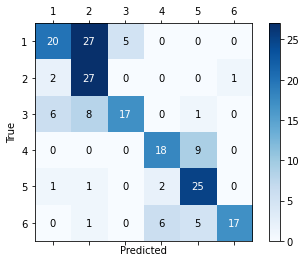

              precision    recall  f1-score   support

         1.0      0.690     0.385     0.494        52
         2.0      0.422     0.900     0.574        30
         3.0      0.773     0.531     0.630        32
         4.0      0.692     0.667     0.679        27
         5.0      0.625     0.862     0.725        29
         6.0      0.944     0.586     0.723        29

    accuracy                          0.623       199
   macro avg      0.691     0.655     0.638       199
weighted avg      0.691     0.623     0.620       199



In [ ]:
classifier = tree.DecisionTreeClassifier(criterion='entropy') 
y_test, y_pred = leaveOneOutSubjectCrossValidation(x_list, y_list, classifier)

plot_confusion_matrix(y_test, y_pred)

# Human Activity Recognition using CNN & LSTM

## ConvLSTM

* We are going to build a deep learning model that combines convolutional and recurrent layers.

![대체 텍스트](http://drive.google.com/uc?export=view&id=19yuuVxmf7UiHgOsDUxngRAdRFwkLjLsA)

* This architecture is referred to as ConvLSTM. 

* For details, please see [\[Ordóñez & Roggen 2016\]](https://www.mdpi.com/1424-8220/16/1/115). This is one of the earliest work that use ConvLSTM for human activity recognition.

* A depth of at least two recurrent layers is beneficial when processing
sequential data or serial data [Karpathy 2015](https://arxiv.org/abs/1506.02078). 

In [ ]:
from keras.layers import (LSTM, Dropout, Dense, Conv1D, MaxPooling1D, Activation)
from keras import Sequential
from keras.optimizers import Adam

model = Sequential()
model.add(Conv1D(filters = 60, kernel_size = 3, input_shape=(60, 4)))
model.add(MaxPooling1D(pool_size=2))
model.add(Activation('relu'))

for layer in range(0, 3):
  model.add(Conv1D(filters = 120, kernel_size = 3))
  model.add(MaxPooling1D(2))
  model.add(Activation('relu'))

model.add(LSTM(60, return_sequences=True))
model.add(LSTM(60))

model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_9 (Conv1D)            (None, 58, 60)            780       
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 29, 60)            0         
_________________________________________________________________
activation_9 (Activation)    (None, 29, 60)            0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 27, 120)           21720     
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 13, 120)           0         
_________________________________________________________________
activation_10 (Activation)   (None, 13, 120)           0         
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 11, 120)          

### Conv1D

```
Conv1D(filters = 60, kernel_size = 3, input_shape=(60, 4))
```

![대체 텍스트](http://drive.google.com/uc?export=view&id=16JfdL4bCFvlyCWkJvG_Sc7_S7nmqsW41)

* The argument filters, which is 60, represents number of filters. Each filter will create a separate output.

* The argument input_shape(60, 4) represent 60 time-steps with 4 data point (e.g., acc-x).

* The aguement kernal_size, which is 5, represents the width of the kernel. Or you can simply think it as the size of the sliding window.

* The height of the kernal is same as the number of data points (i.e., 4).

* The below illustrates an exmaple of Conv2D 



```
Conv2D(filters = 60, kernel_size = [3, 3], input_shape = (60, 4))
```

![대체 텍스트](http://drive.google.com/uc?export=view&id=1Q98GnKyV_wQQ8Pj6Bi5J2spX8Jm9Z61W)


Maxpooling1D 
```
model.add(MaxPooling1D(pool_size=2, stride=1))
```

* Max pooling layers was inserted after convolutional layers If we see convolutional layers as detectors of a specific feature, max pooling keeps only the “strongest” value of that feature inside the pooling rectangle. 

* Each channel (hence each feature) is treated separately.

* The argument pool_size, which is 2, represent the size of the vector within which the maximum is computed. 

* We did not set stide (default: 1) and padding (default: 'valid').

* The argument 'stride' represents the number of cells to move while performing the pooling along the vector. 

* When the padding is 'same', padding is added, so that the output has the same length as the input.

* The below illustrates a 1D Max pooling (or MaxPooling1D) with a pool sized 2 and a stride of 2.


![대체 텍스트](http://drive.google.com/uc?export=view&id=18lxPsVibnTpWqFn7J8sDwHLaHM-JQz5M)


## Holdout method

* For DL model, holdout method is also widely used. We will evaluate the performance of the ConvRNN model using holdout method. 




* It is important to normalize data before feeding to a neural network. 

* The below illustrate how the normalization help the model optimization (for details see this Andrew Ng's nice [tutorial](
https://www.youtube.com/watch?v=FDCfw-YqWTE&feature=youtu.be)). 

![대체 텍스트](http://drive.google.com/uc?export=view&id=1EpXc2vz5X3Evo6aPuy6QQJYjyNxkOh_T)


*  A common way to do so is by subtracting the mean and dividing by the standard deviation of each feature (i.e., Z-score normalization).

* The mean and standard deviation should only be computed using the training data. 

* Alternatively, we can do min-max normalization using minmum and maximum values.

* Similar to Z-score normalization, we compute minmum and maximum values using the training data, and the same minmum and maximum values are applied to test data.

In [ ]:
from keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler

def holdOutMethod(df, window_size_in_ms = 3000, overlap_ratio = 0.5, fs = 50, train_ratio=0.8, doShuffle = True):
  window_size = int(window_size_in_ms/fs); overlap_size = int(window_size*(1-overlap_ratio))

  labels = df.to_numpy(copy=True)

  values = df.drop(columns=['label']).to_numpy(copy=True) # Make a copy and convert to a NumPy array

  # Split into training and test set  
  train_length = int(len(values)*train_ratio) # calculate size of train set
  train = values[:train_length]; test = values[train_length:]

  # Normalize dataset
  # It is important to normalize data before feeding to a neural network. 
  # A common way to do so is by subtracting the mean and dividing by the standard deviation of each feature.
  # The mean and standard deviation should only be computed using the training data. 
  # For the normalization, we use min-max normalization using MinMaxScaler method.
  # Alternative way to do min-max normalization
  # train = (train-train_min)/(train_max-train_min)
  # test = (test-train_min)/(train_max-train_min)
  # evaluation = (evaluation-train_min)/(train_max-train_min)
  
  scaler = MinMaxScaler(feature_range=(train.min(), train.max()))
  train = scaler.fit_transform(train)
  test = scaler.fit_transform(test)
 
  x_train, y_train = get_x_y_data(train, labels[:train_length], window_size, overlap_size, doShuffle)
  x_test, y_test = get_x_y_data(test, labels[train_length: ], window_size, overlap_size)

  y_train = to_categorical(y_train - 1, num_classes = 6)
  y_test = to_categorical(y_test - 1, num_classes = 6)
  return (x_train, y_train), (x_test, y_test)
#to_categorical(np.array(y), num_classes = 6)

def get_x_y_data(values, labels, window_size, overlap_size, doShuffle = False):
  # calculate an array containing the start index of each x data
  start_index_array = np.arange(0, len(values) - window_size, overlap_size)

  if doShuffle:
    np.random.shuffle(start_index_array)  # shuffle the start_index_array

  # We shuffle ONLY "the order of start index".
  # This means we don't shuffle the ordering within individual sequences, but shuffle the order in which sequences are fed to the RNN
  #
  # This is fine when your network is stateless. 
  # On the other hand, when your network is stateful, a different shuffle strategy is necessary. 
  #   
  # Stateless case: 
  # the network's memory only persists for the duration of a sequence. 
  # Training on sequence B before sequence A doesn't matter because the network's memory state does not persist across sequences.
  #
  # Stateful case:
  # The network's memory persists across sequences. We cannot blindly shuffle your data and expect optimal results. 
  # Sequence A should be fed to the network before sequence B because we want the network to evaluate sequence B with memory of what was in sequence A.
  #
  # Philippe Remy wrote a nice tutorial, see if you are curious to know how to suffle training set for stateful RNN
  # http://philipperemy.github.io/keras-stateful-lstm/

  x = []; y = []
  for i in start_index_array:
    subset_y = labels[range(i, i+window_size)]
    labels_max = subset_y.min()
    if labels_max  != subset_y.min():
      continue
    x.append(values[range(i, i+window_size)])
    y.append(labels_max)
  return np.array(x), np.array(y)

## Trainging and testing ConvLSTM

In [ ]:
from KCC2020_HAR_dataset import load_by_user
import pandas as pd
import numpy as np

dfs = []

for uid in np.arange(1, 16):
  u_dfs = load_by_user(uid)
  for df in u_dfs:
    _df = df.copy()
    _df = calculateMagnitudeValues(df)
    dfs.append(_df)

data = pd.concat(dfs, ignore_index=True)

In [ ]:
(x_train, y_train), (x_test, y_test) = holdOutMethod(data)

In [ ]:
model.fit(x_train, y_train, epochs=150, batch_size=64, validation_data=(x_test, y_test))

Train on 9222 samples, validate on 2304 samples
Epoch 1/150
9222/9222 [==============================] - 6s 598us/step - loss: 0.7379 - accuracy: 0.7851 - val_loss: 0.8706 - val_accuracy: 0.6419
Epoch 2/150
9222/9222 [==============================] - 4s 462us/step - loss: 0.4035 - accuracy: 0.8553 - val_loss: 0.9578 - val_accuracy: 0.6250
Epoch 3/150
9222/9222 [==============================] - 4s 459us/step - loss: 0.3190 - accuracy: 0.8945 - val_loss: 0.8953 - val_accuracy: 0.6181
Epoch 4/150
9222/9222 [==============================] - 4s 454us/step - loss: 0.2827 - accuracy: 0.9089 - val_loss: 0.7583 - val_accuracy: 0.6884
Epoch 5/150
9222/9222 [==============================] - 4s 455us/step - loss: 0.2673 - accuracy: 0.9105 - val_loss: 1.2789 - val_accuracy: 0.6671
Epoch 6/150
9222/9222 [==============================] - 4s 465us/step - loss: 0.2421 - accuracy: 0.9150 - val_loss: 0.8624 - val_accuracy: 0.6623
Epoch 7/150
9222/9222 [==============================] - 4s 458us/step